### TITANIC PREDICTION

In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

* Read the Dataset

In [2]:
train_set = pd.read_csv('train.csv', index_col = 'PassengerId')
test_set = pd.read_csv('test.csv', index_col = 'PassengerId')

In [3]:
train_set.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### Dataset Overview
There is 891 entries

Columns with missing values: 'Age', 'Cabin', 'Embarked'

Variable Notes

pclass: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.

### Analyze Data
Target: 'Survived'

Column Data type:

Numerical:

* Discrete data:   'Age'
* Continuous data: 'Fare'

Categorical:

* Nominal data: 'Survived', 'Sex', 'Ticket', 'Embarked', 'SibSp', 'Parch',
* Ordinal data: 'Pclass'

Special: 'Name', 'Ticket', 'Cabin'

Missing Values columns: Cabin >> Age > Embarked 

In [5]:
numerical_col = [ 'Age', 'Fare']
categorical_col = ['SibSp', 'Parch', 'Sex', 'Embarked', 'Pclass']
train_set['Survived'] = train_set['Survived'].astype('category')

train_set[categorical_col] = train_set[categorical_col].astype('category')
test_set[categorical_col] = test_set[categorical_col].astype('category')


In [6]:
train_set.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [7]:
train_set.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


### Visualize Data

Data distribution

In [8]:
train_set['Survived'].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


Numerical Data Distribution

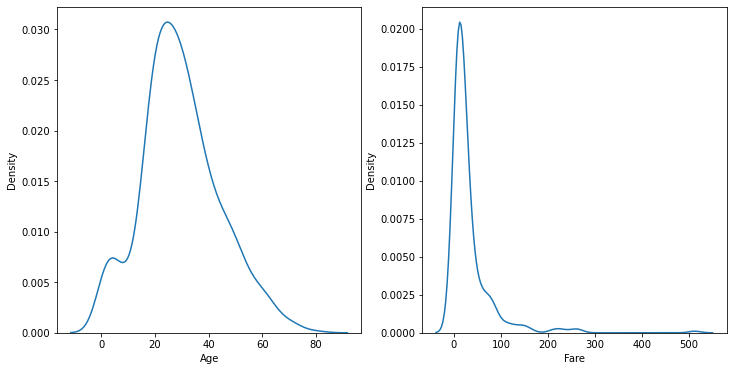

In [9]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (12, 6))
for i in range (2):
    ax_i = ax[i]
    sns.kdeplot(data = train_set, x = numerical_col[i], ax = ax_i)
plt.show()

Categorical Data Distribution

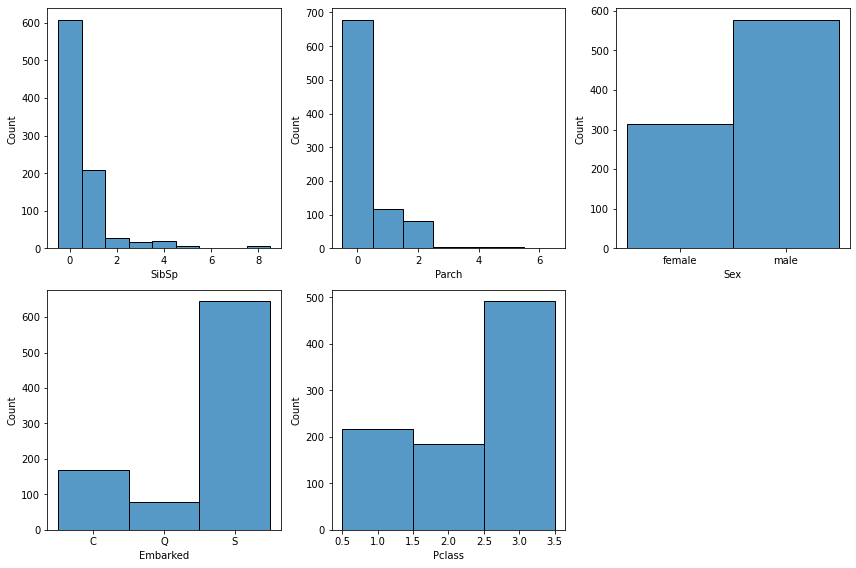

In [10]:
n_row = 2
n_col = 3

fig, ax = plt.subplots(nrows= n_row, ncols= n_col, figsize = (n_col*4, n_row*4))

for r in range(n_row):
    for c in range(n_col):
        i = r*n_col + c
        if i < len(categorical_col):
            ax_i = ax[r, c]
            sns.histplot(data = train_set, x = categorical_col[i], ax = ax_i)
ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

* Affection of Features

Numerical Columns

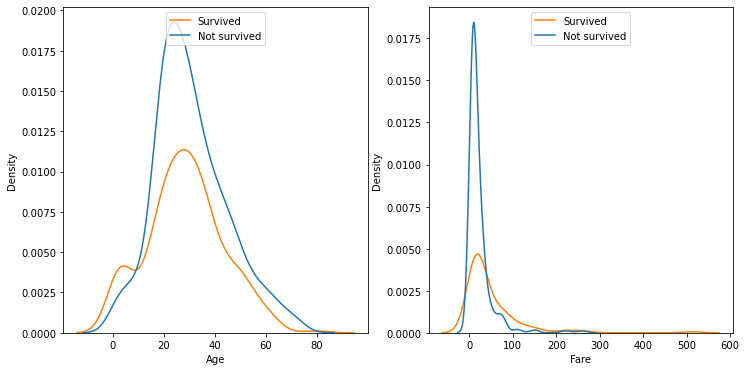

In [11]:
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize = (12, 6))
for i in range(2):
    ax_i = ax[i]
    sns.kdeplot(data = train_set, x = numerical_col[i], ax = ax_i, hue = 'Survived')
    ax_i.legend(title = '', loc = 'upper center', labels = ['Survived', 'Not survived'])

plt.show()


Categorical Columns

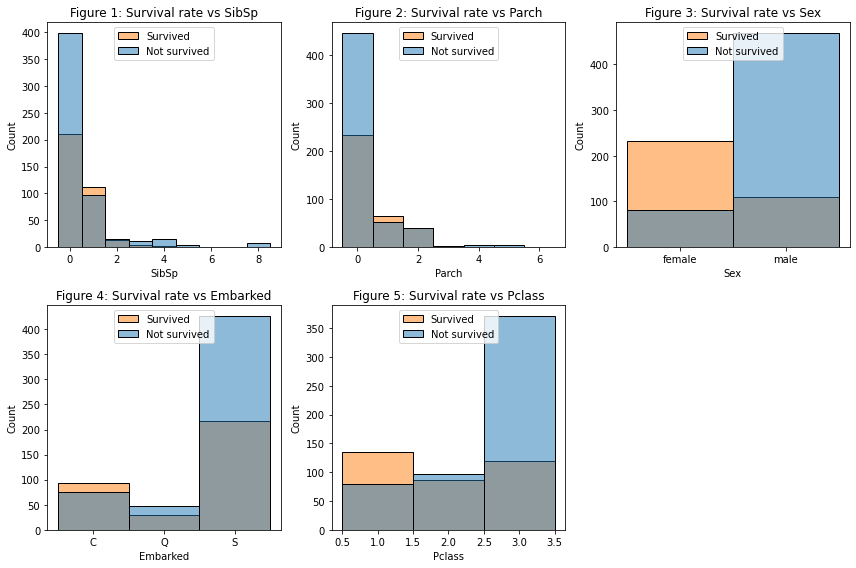

In [12]:

fig, ax = plt.subplots(nrows= n_row, ncols= n_col, figsize = (n_col*4, n_row*4))

for r in range(n_row):
    for c in range(n_col):
        i = r*n_col + c
        if i < len(categorical_col):
            ax_i = ax[r, c]
            sns.histplot(data = train_set, x = categorical_col[i], hue = 'Survived', ax = ax_i)
            ax_i.set_title(f'Figure {i+1}: Survival rate vs {categorical_col[i]}')
            ax_i.legend(title = '', loc = 'upper center', labels = ['Survived', 'Not survived'])
ax.flat[-1].set_visible(False)
plt.tight_layout()            
plt.show()

Special Features:

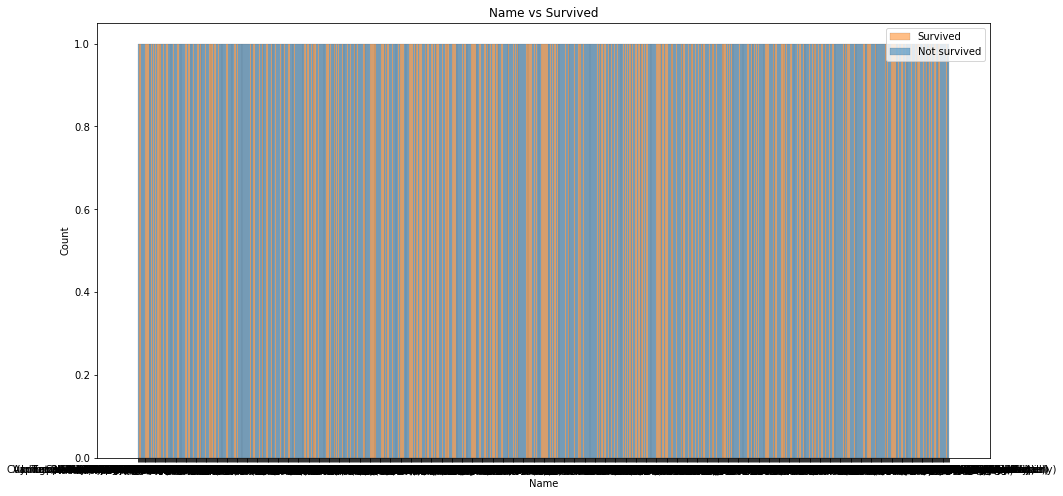

In [13]:
plt.figure(figsize =  (16, 8))
sns.histplot(data = train_set, x = 'Name', hue = 'Survived')
plt.legend(title = '', loc = 'upper right', labels = ['Survived', 'Not survived'])
plt.title('Name vs Survived')
plt.show()

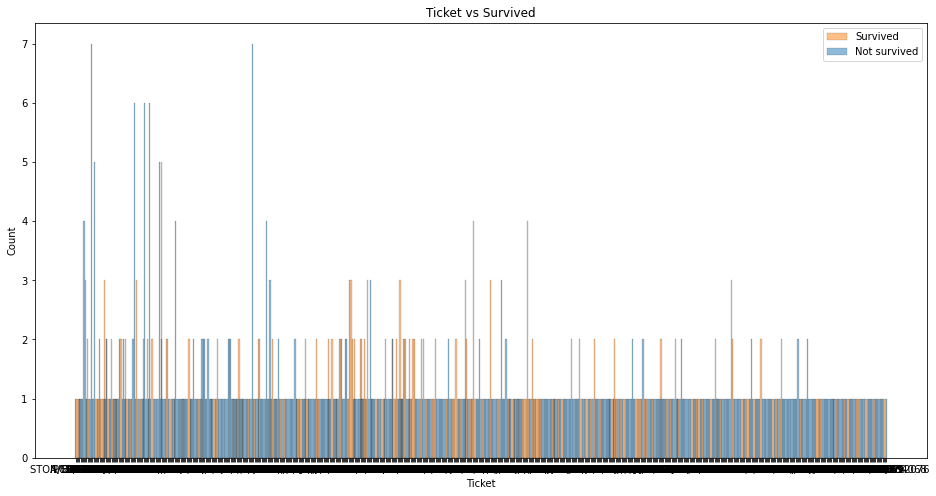

In [14]:

plt.figure(figsize =  (16, 8))
sns.histplot(data = train_set, x = 'Ticket', hue = 'Survived')
plt.legend(title = '', loc = 'upper right', labels = ['Survived', 'Not survived'])
plt.title('Ticket vs Survived')
plt.show()

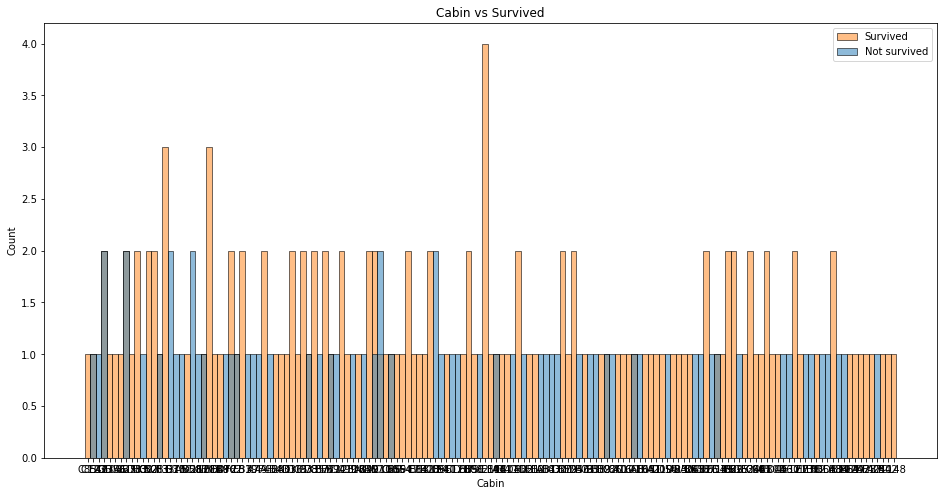

In [15]:
plt.figure(figsize =  (16, 8))
sns.histplot(data = train_set, x = 'Cabin', hue = 'Survived')
plt.legend(title = '', loc = 'upper right', labels = ['Survived', 'Not survived'])
plt.title('Cabin vs Survived')
plt.show()

These special features are really a mess. Therefor, They need a feature engineering

### FEATURE ENGINEERING

1. Feature 'Name'

In [16]:
import re
train_set['preName'] = [re.split('[,.]', x)[1] for x in train_set['Name']]
train_set['preName'].describe()


count     891
unique     17
top        Mr
freq      517
Name: preName, dtype: object

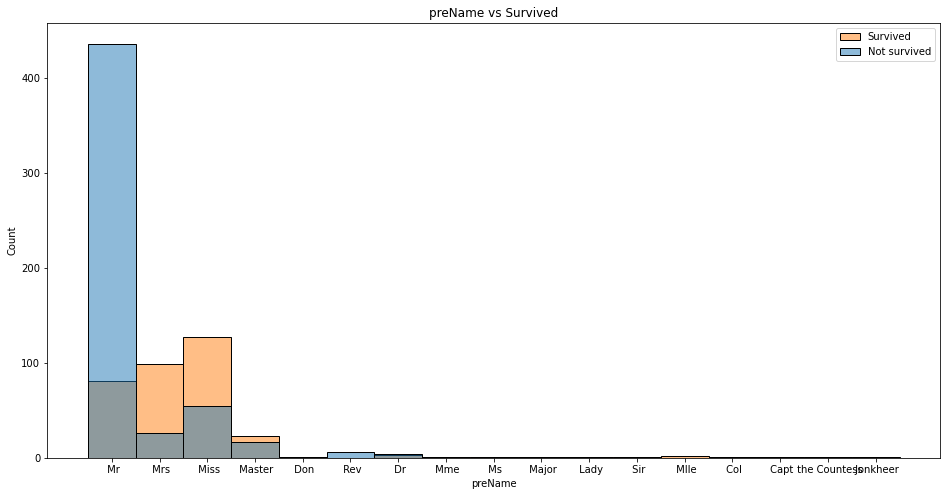

In [17]:
plt.figure(figsize =  (16, 8))
sns.histplot(data = train_set, x = 'preName', hue = 'Survived')
plt.legend(title = '', loc = 'upper right', labels = ['Survived', 'Not survived'])
plt.title('preName vs Survived')
plt.show()

In [18]:
popularName = ['Mr', "Mrs", "Miss", "Master", "Dr", "Rev"]
train_set['preName'] = [x if x.strip() in popularName else '_' for x in train_set['preName']]

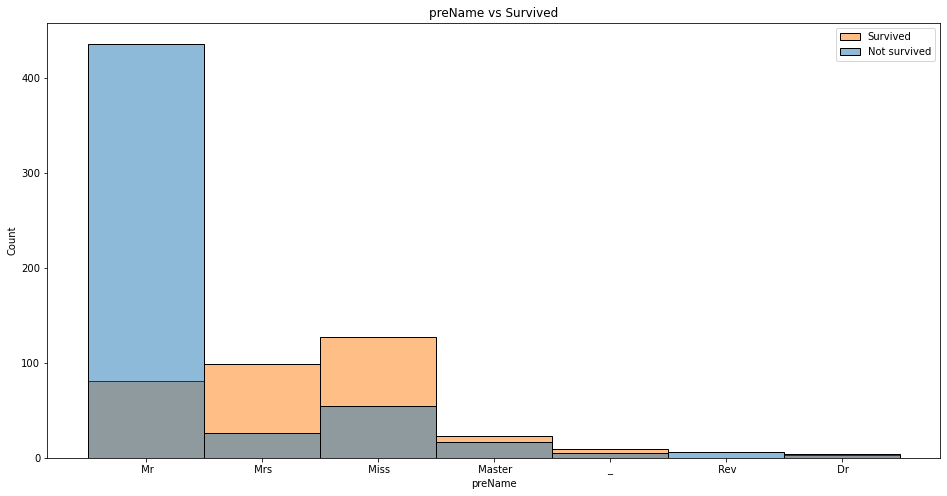

In [19]:
plt.figure(figsize =  (16, 8))
sns.histplot(data = train_set, x = 'preName', hue = 'Survived')
plt.legend(title = '', loc = 'upper right', labels = ['Survived', 'Not survived'])
plt.title('preName vs Survived')
plt.show()

2. Feature 'Ticket'

In [20]:
train_set['azTicket'] = ['0' if x.isnumeric() else re.split('[ ./0-9]',x)[0] for x in train_set['Ticket']]


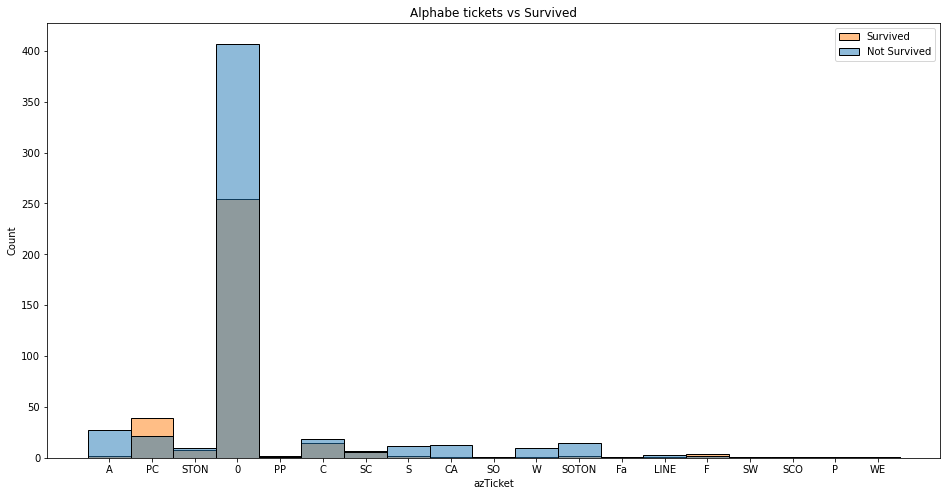

In [21]:
plt.figure(figsize= (16, 8))
sns.histplot(data = train_set, x = 'azTicket', hue = 'Survived')
plt.legend(title='', loc='upper right', labels=['Survived', 'Not Survived'])
plt.title('Alphabe tickets vs Survived')
plt.show()

3. Feature 'Cabin'

In [22]:
train_set['Cabin'].fillna('N')
train_set['azCabin'] = [str(x)[0] for x in train_set['Cabin']]

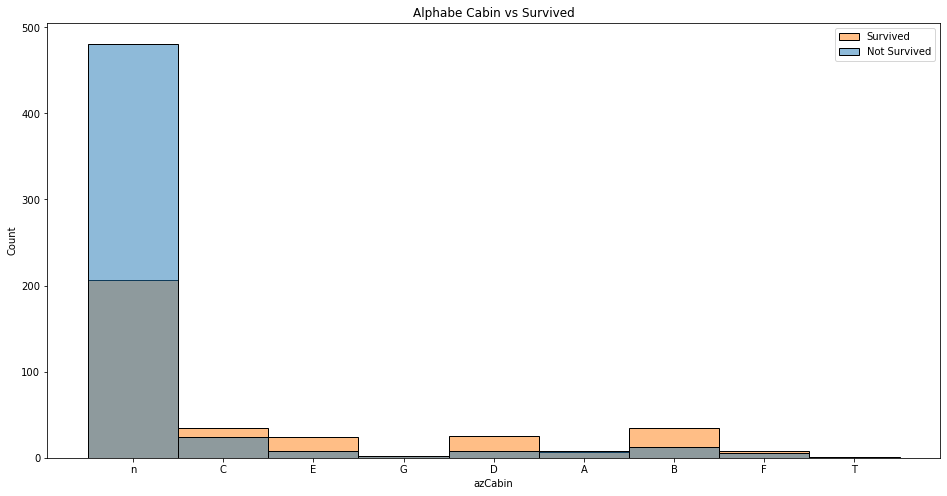

In [23]:
plt.figure(figsize=(16,8))
sns.histplot(data= train_set, x= 'azCabin', hue= 'Survived')
plt.legend(title='', loc= 'upper right', labels=['Survived', 'Not Survived'])
plt.title('Alphabe Cabin vs Survived')
plt.show()

In [24]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
 11  preName   891 non-null    object  
 12  azTicket  891 non-null    object  
 13  azCabin   891 non-null    object  
dtypes: category(6), float64(2), object(6)
memory usage: 69.1+ KB


4. Feature 'Age'

In [25]:
train_set['Age'] = train_set['Age'].fillna(train_set['Age'].median)

5. Feature 'Embarked'

In [30]:
train_set.dropna(subset = ['Embarked'], inplace= True)

# Drop some old features

In [27]:
train_set.drop(['Cabin', 'Ticket', 'Name'], axis= 1, inplace = True)

In [31]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    category
 1   Pclass    889 non-null    category
 2   Sex       889 non-null    category
 3   Age       889 non-null    object  
 4   SibSp     889 non-null    category
 5   Parch     889 non-null    category
 6   Fare      889 non-null    float64 
 7   Embarked  889 non-null    category
 8   preName   889 non-null    object  
 9   azTicket  889 non-null    object  
 10  azCabin   889 non-null    object  
dtypes: category(6), float64(1), object(4)
memory usage: 48.1+ KB
